## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing the dataset

In [11]:
df=pd.read_csv("C:/Data Analysis Project/Python Project/Swiggy Sales Analysis-Python/swiggy_data.csv",encoding='unicode_escape')

In [12]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [13]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


## Metadata

In [14]:
print("Number of rows :",df.shape[0])
print("Number of columns :",df.shape[1])

Number of rows : 197430
Number of columns : 10


## Datatypes

In [23]:
df['Order Date']=pd.to_datetime(df['Order Date'],format="%Y-%M-%D")

In [26]:
df.dtypes

State                      object
City                       object
Order Date         datetime64[ns]
Restaurant Name            object
Location                   object
Category                   object
Dish Name                  object
Price (INR)               float64
Rating                    float64
Rating Count                int64
dtype: object

In [30]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')

In [33]:
df.columns
df.rename(columns={'price_(inr)':'price'},inplace=True)

In [108]:
df.describe()

,order_date,price,rating,rating_count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


## KPI'S

### 1.Total Sales

In [43]:
Total_Sales=df['price'].sum()
print(f"Total Sales :₹{Total_Sales:,.2f}")

Total Sales :₹53,012,505.77


### 2.Avg Rating 

In [46]:
Avg_Rating=df['rating'].mean()
print(f"Avg Rating :{Avg_Rating :.2f}")

Avg Rating :4.34


### 3.Avg Order value

In [47]:
Avg_Order_Value=df['price'].mean()
print(f"Avg Order Value : ₹{Avg_Order_Value :,.2f}")

Avg Order Value : ₹268.51


### 4.Rating Count

In [48]:
Rating_Count=df['rating_count'].sum()
print('Rating Count :',Rating_Count)

Rating Count : 5591574


### 5.Total Orders

In [50]:
Total_Orders=df['category'].count()
print("Total Orders :",Total_Orders)

Total Orders : 197430


## Problem Statement

### 1. Monthly sales trends

C:\Users\Arun Kumar Angu\AppData\Local\Temp\ipykernel_36016\41465904.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  df['year_month']=df['order_date'].dt.to_period('m').astype(str)


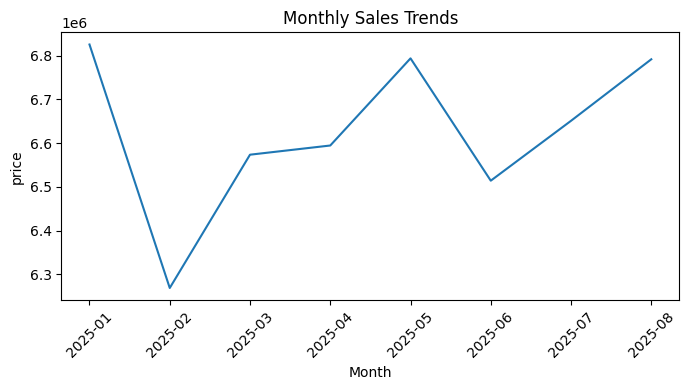

In [75]:
df['year_month']=df['order_date'].dt.to_period('m').astype(str)
monthly_sale=df.groupby('year_month')['price'].sum().reset_index()
plt.figure(figsize=(7,4))
plt.plot(monthly_sale['year_month'],monthly_sale['price'])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('price')
plt.title('Monthly Sales Trends')
plt.tight_layout()
plt.show()

***From the above line graph analysis, we observe that sales are higher in the months of 2025-01, 2025-05, and 2025-08 compared to other months***

### 2.Daily Sales Trend

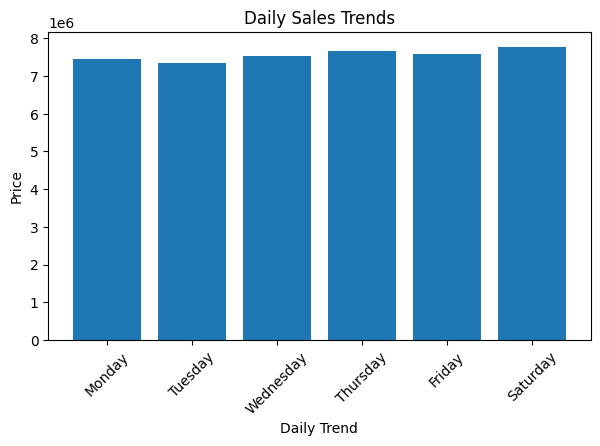

In [76]:
df['daily_trend']=df['order_date'].dt.day_name()
daily_trend=df.groupby('daily_trend')['price'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','sunday'])
plt.figure(figsize=(7,4))
plt.bar(daily_trend.index,daily_trend.values)
plt.xticks(rotation=45)
plt.xlabel('Daily Trend')
plt.ylabel('Price')
plt.title("Daily Sales Trends")
plt.show()

***From the daily trend analysis, we observe that sales remain consistent across all days with no major fluctuations. This indicates stable customer demand and uniform performance throughout the period***

### 3.Total Sales by Food types

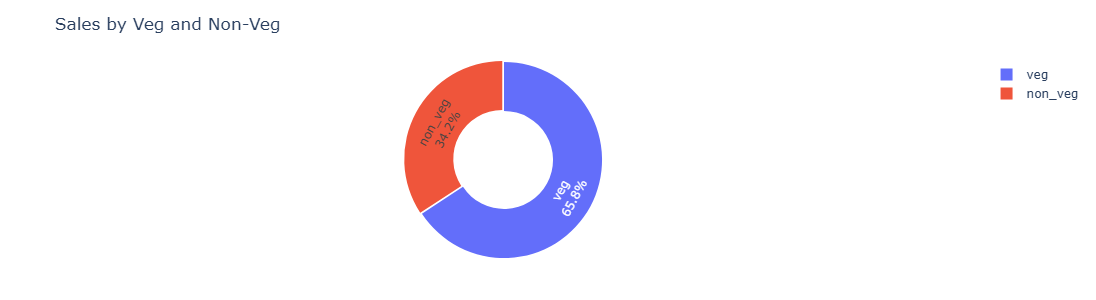

In [96]:
non_veg=['chicken','mutton','egg','fish','prawn','kabab','kebab','Non-Veg','non-veg']
df['Food_category']=np.where(
    df['dish_name'].str.lower().str.contains('|'.join(non_veg),na=False),"non_veg","veg")
food_sale=df.groupby('Food_category')['price'].sum().reset_index()
fig=px.pie(food_sale,values='price',names='Food_category',hole=0.5,title='Sales by Veg and Non-Veg')
fig.update_traces(textinfo='percent+label',pull=[0.02,0])
fig.update_layout(height=300,margin=dict(t=60,b=40,l=40,r=40))
fig.show()

***From the pie chart analysis, we observe that Veg products have higher sales compared to Non-Veg products. This indicates that customers prefer vegetarian dishes more in terms of revenue contribution. Non-Veg products contribute comparatively lower sales. The insight from this analysis can help in inventory planning, menu optimization, and marketing strategies to focus more on high-performing food categories.***

### 4.Total Sales by state

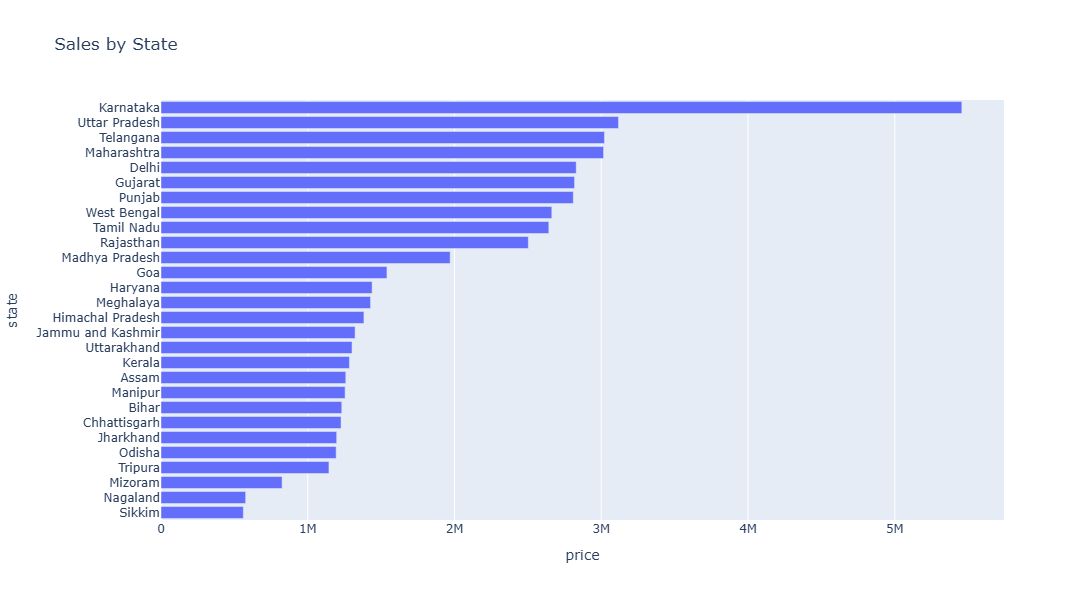

In [107]:
state_sales = df.groupby('state', as_index=False)['price'] .sum().sort_values('price', ascending=False)
fig = px.bar(
    state_sales,
    x='price',
    y='state',
    orientation='h',
    title='Sales by State'
)
fig.update_layout(height=600,yaxis=dict(autorange='reversed'))
fig.show()

***From the state-wise sales analysis, we observe that states like Karnataka, Maharastra, Delhi, Uttar Pradesh and Telangana have higher sales compared to other states. These states contribute significantly to the total revenue, indicating stronger market demand and customer engagement in those regions.***

### 5.Quarterly Summary

In [110]:
df['quarter']=df['order_date'].dt.to_period('q').astype(str)
qua=df.groupby('quarter',as_index=False).agg(total_sale=('price','sum'),
                                             avg_rating=('rating','mean'),
                                             total_order=('order_date','count'))
qua['total_sale']=qua['total_sale'].round(0)
qua['avg_rating']=qua['avg_rating'].round(2)
qua

C:\Users\Arun Kumar Angu\AppData\Local\Temp\ipykernel_36016\2471713156.py:1: FutureWarning:

'q' is deprecated and will be removed in a future version, please use 'Q' instead.



,quarter,total_sale,avg_rating,total_order
0,2025Q1,19667822.0,4.34,73096
1,2025Q2,19902257.0,4.34,74163
2,2025Q3,13442427.0,4.34,50171


### 6.Top 5 cities by sales

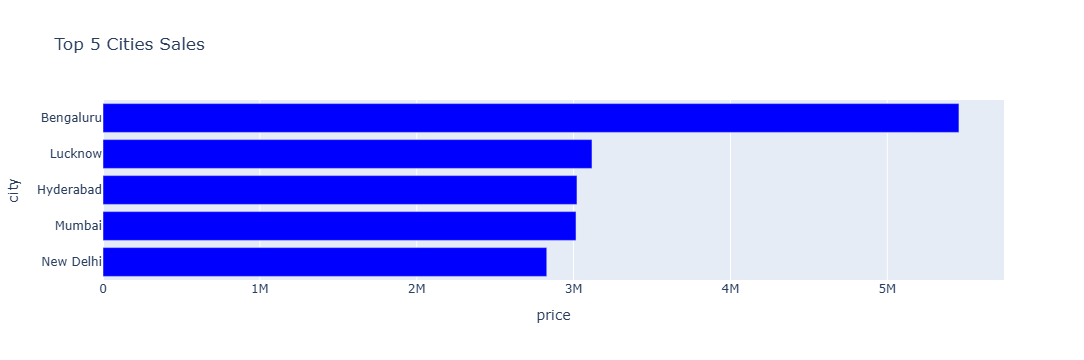

In [114]:
cite=df.groupby('city')['price'].sum().nlargest(5).sort_values().reset_index()
fig=px.bar(cite,
           x='price',
           y='city',
           orientation='h',
           title='Top 5 Cities Sales',
           color_discrete_sequence=['blue'])
fig.show()